In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Hertzsprung–Russell Diagram (H-R Diagram)

The Hertzsprung–Russell Diagram is a scatter plot used in astrophysics to show the relationship between the **luminosity** (or absolute magnitude) of stars and their **surface temperature** (or spectral class).

- **X-axis**: Temperature (decreasing to the right) or Spectral Type (O to M)
- **Y-axis**: Luminosity (in solar units) or Absolute Magnitude

Stars are grouped into regions:
- **Main Sequence**: Where most stars lie, including the Sun
- **Giants & Supergiants**: Bright, cooler stars in the upper right
- **White Dwarfs**: Hot, dim stars in the lower left

The H-R Diagram helps astronomers understand stellar evolution and classify different types of stars.

In [ ]:
'''
The CSV file is a star catalog and contains information of those respective stars. The information are 'Temperature', 'Lumonisity', 'Radius', 'Absolute magnitude', 'Star color', 'Spectral Class', and 'Star type'.
'''

# Load your CSV file

# For  Google Colab

#val = pd.read_csv('/content/drive/MyDrive/6 class csv.csv')

# For Local Systerm

#val = pd.read_csv(r'your_file_location/6 class csv.csv')

print(val)

# The following code is to simplify the usage of these info.

T = val['Temperature (K)']
L = val['Luminosity(L/Lo)']
R = val['Radius(R/Ro)']
A_M = val['Absolute magnitude(Mv)']
S_C = val['Star color']
SP_C = val['Spectral Class']
S_T = val['Star type']

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

**The type of graphs below which I have used is Temperature vs. Luminosity and the spectral class is defined on the temperature scale**

Plotting of the Graph for Hertzsprung-Russell Diagram (HRD) with the help of Matplotlib

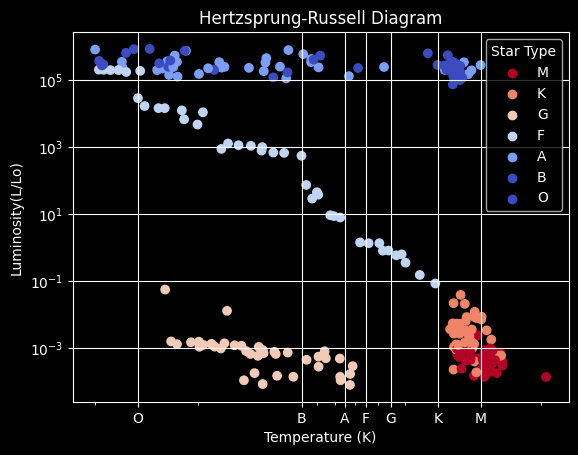

In [3]:
plt.style.use('dark_background')
scatter = plt.scatter(T, L, c=S_T, cmap='coolwarm_r')
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()

spectral_types = ['M', 'K', 'G', 'F', 'A', 'B', 'O']
spectral_temps = [3000, 4000, 5500, 6500, 7500, 10000, 30000]

plt.xticks(spectral_temps, spectral_types)

plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram')
plt.grid()

legend_labels = {0: 'M', 1: 'K', 2: 'G', 3: 'F', 4: 'A', 5: 'B', 6: 'O'}
handles = [plt.scatter([], [], color=scatter.cmap(scatter.norm(label)), label=legend_labels[label]) for label in legend_labels]
plt.legend(handles=handles, title='Star Type')

Plotting of the Graph for Hertzsprung-Russell Diagram (HRD) with the help of Plotly

In [4]:
'''
Plotly is an interactive graphical repressentaion python module. One can hover over the points in the graphs and see the info of the point
which represent a star, and 'Color-Map' on the top-right corner of the graph can be used to show or hide individual categories for easier understanding.
'''

plotly_val = pd.DataFrame({
    'Temperature': T,
    'Luminosity': L,
    'Spectral Type': SP_C
})

fig = px.scatter(plotly_val, x='Temperature', y='Luminosity', color='Spectral Type',
                color_discrete_map={'M': 'red', 'K': 'lightyellow', 'G': 'yellow','F': 'white', 'A': 'lightblue', 'B': 'lightblue', 'O': 'blue'},
                 title='Hertzsprung-Russell Diagram', template='plotly_dark',
                 log_x=True, log_y=True)

fig.update_layout(xaxis=dict(autorange='reversed'),
                  width=800,
                  height=1000,
                  xaxis_title='Temperature (K)',
                  yaxis_title='Luminosity (L/Lo)',
                  legend_title='Star Type')
fig.update_xaxes(
    tickmode='array',
    tickvals=[3000, 4000, 5500, 6500, 7500, 10000, 30000],
    ticktext=['M = 3000', 'K = 4000', 'G = 5500', 'F = 6500', 'A = 7500', 'B = 10000', 'O = 30000']
)

fig.write_html("HR_Diagram_Interactive.html")

fig.show()